Cost after iteration 0: 0.695191
Cost after iteration 100: 0.643795
Cost after iteration 200: 0.628672
Cost after iteration 300: 0.597467
Cost after iteration 400: 0.533408
Cost after iteration 500: 0.462755
Cost after iteration 600: 0.398407
Cost after iteration 700: 0.307716
Cost after iteration 800: 0.204968
Cost after iteration 900: 0.108911
Cost after iteration 1000: 0.068801
Cost after iteration 1100: 0.037403
Cost after iteration 1200: 0.022994
Cost after iteration 1300: 0.016837
Cost after iteration 1400: 0.013092
Cost after iteration 1500: 0.010553
Cost after iteration 1600: 0.008716
Cost after iteration 1700: 0.007373
Cost after iteration 1800: 0.006346
Cost after iteration 1900: 0.005541
Cost after iteration 2000: 0.004890
Cost after iteration 2100: 0.004358
Cost after iteration 2200: 0.003921
Cost after iteration 2300: 0.003555
Cost after iteration 2400: 0.003242


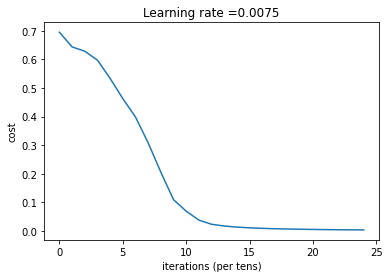

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from lr_utils import *
from testCases import *
from dnn_utils import sigmoid,sigmoid_backward,relu,relu_backward



#deep-layer initialize_parameters
def initialize_parameters_deep(layer_dims):
   
    parameters={}
    L=len(layer_dims)
    
    for l in range(1,L):
        parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])/ np.sqrt(layers_dims[l - 1])
        parameters["b"+str(l)]=np.zeros(shape=(layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

def linear_forward(A_pre,W,b):
    
    Z=np.dot(W,A_pre)+b  
    
    assert(Z.shape==(W.shape[0],A_pre.shape[1]))
    cache=(A_pre,W,b)
    
    return Z,cache

def linear_activation_forward(A_prev,W,b,activation):
    
    if activation=="sigmoid":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=sigmoid(Z)
        
    elif activation=="relu":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=relu(Z)
    
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
    cache=(linear_cache,activation_cache)
    
    return A,cache

def L_model_forward(X,parameters):

    caches=[]
    A=X
    L=len(parameters)//2 #number of layers

    for l in range(1,L):
        A_prev=A

        A,cache=linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(cache)
    
    AL,cache=linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    
    assert(AL.shape==(1,X.shape[1]))
    
    return AL,caches

def compute_cost(AL,Y):
    
    m=Y.shape[1]
    
    cost=-1/m*np.sum(Y*np.log(AL)+(1-Y)*(np.log(1-AL)))
    
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    return cost
    
def linear_backward(dZ,cache):
    
    A_prev,W,b=cache
    m=A_prev.shape[1]
    
    dW=(1/m)*np.dot(dZ,A_prev.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev,dW,db

def linear_activation_backward(dA,cache,activation):
    
    linear_cache,activation_cache=cache
    
    if activation=='relu':
        dZ=relu_backward(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
        
    elif activation=='sigmoid':
        dZ=sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
        
    return dA_prev,dW,db

def L_model_backward(AL,Y,caches):
   
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    
    current_cache=caches[L-1]
    grads["dA"+str(L)],grads["dW"+str(L)],grads["db"+str(L)]=linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache=caches[l]
        dA_prev_temp,dW_temp,db_temp=linear_activation_backward(grads["dA"+str(l+2)],current_cache,"relu")
        grads["dA"+str(l+1)]=dA_prev_temp
        grads["dW"+str(l+1)]=dW_temp
        grads["db"+str(l+1)]=db_temp
        
    return grads

def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    
    for l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
        
    return parameters

def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations = 3000,print_cost=False):
    parameters=initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL,caches=L_model_forward(X,parameters)
        
        cost=compute_cost(AL,Y)
        
        grads=L_model_backward(AL,Y,caches)
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%100==0:
            print("Cost after iteration %i: %f"%(i,cost))
        if print_cost and i%100==0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning rate ='+str(learning_rate))
    plt.show()
    
    return parameters
        
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.


layers_dims=[12288,20,7,5,1]
costs=[]
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500,print_cost=True)



In [7]:
def predict(X, Y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2 # 神经网络的层数
    p = np.zeros((1,m))
    
    #根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(float(np.sum((p == Y))/m)))
        
    return p

pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 1.0
Accuracy: 0.76
